## Foundations of Statistical Modeling
### Prof. Dr. Stefan Kettemann
### Spring term 2024
### Assingment 5.
#### Name: Protogene Hahirwabayo

#### 1. Find and Download a Data Set [5 Points ]

See the project guidelines on TEAMS for hints how to find and choose interesting data sets.The data set should have at least 2 features. It does not have to be huge, but should contain atleast several hundred data points.

1. Describe the raw dataset you have chosen for the project in mathematical correct formalism, define the universe in which the data has been taken, the RV functions, and the data value spaces S.
2. Describe whether you had to clean the data, whether there are any missing values.
3. How did you deal with missing values?
4. Show excerpts of the raw data.
#### 2. Distribution, Moments [5 Points ]

Choose from this data set 1 numerical features where you have at least 100 measurements withresults in a discrete DVS S (if it is a continous S, choose intervals with some bin width d, tomap it on a discrete S).
1. Plot the corresponding histograms and the pmf of this discrete distribution.
2. Calculate the mean value, the standard deviation, the skewness and the kurtosis of this dis-tribution.
3. Check all kinds of distributions which we reviewed in the lecture. To which kind of dis-tribution function does the pmf of the feature you choose resemble most closely?

Find thehyperparameters of that distribution function which minimise the MSE.

### Question 1: Data Exploration, Data Preprocessing

### Dataset Summary: Amazon Fashion

the following dataset is amazon fashing showing different rating and product reviews.rating is categorized from Good to bad from 5 to 0.Each review is labeled with sentiment, indicating whether it's positive, neutral, or negative.

#### Universe of the Dataset

Ω = All reviews commented on Amazon fashion products and their respective sentiment

#### Random Variable Function of the Dataset

The Random Variable Function of the Dataset for Amazon fashion reviews and respective sentiment can be represented as follows:

𝑋𝑅: Amazon fashion reviews

𝑋𝑆: sentiment associated with the Amazon fashion reviews

Therefore:

𝑋𝑅:Ω↦𝑆𝑓
where 𝑆𝑓 = {Amazon fashion reviews selected}

𝑋𝑆:Ω↦𝑆𝑠
where 𝑆𝑠 = {positive, negative, neutral}

#### Product RV and DVS

Based on the above definitions, the Product RV and Data Value Space is given by the following formalism:

𝑋 = 𝑋𝑅⊗𝑋𝑆

Therefore, the product DVS is:

𝑆𝐼 = 𝑆𝑅 × 𝑆𝑆

The index 𝐼 contains a paired set such that 𝑖 = {Amazon fashion reviews, sentiment}.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
raw_reviews = pd.read_json('AMAZON_FASHION_5.json', lines= True)
raw_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


### Selecting only verified Reviews

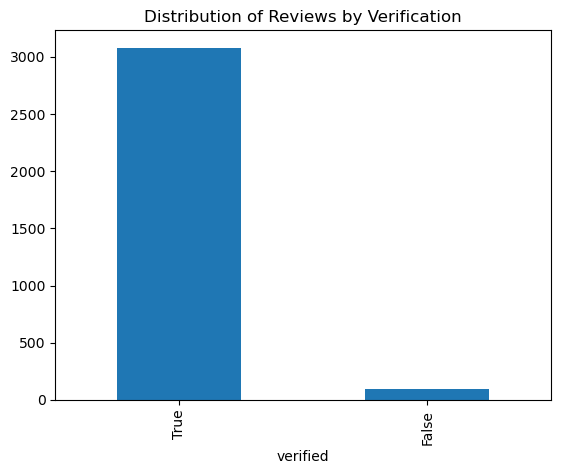

In [3]:
raw_reviews.verified.value_counts().plot(kind='bar', title='Distribution of Reviews by Verification')
plt.show()

In [4]:
verified_reviews = raw_reviews[raw_reviews.verified == True].copy()

In [5]:
verified_reviews.shape

(3079, 12)

### Note: We are now working with ~3K reviews.

### Dropping Columns
we need only 2 features so we will be working with only rating "overall" and reviews "reviewText"

In [6]:
cols =['overall', 'reviewText']
verified_reviews = verified_reviews[cols].copy()
verified_reviews.head()

,overall,reviewText
0,5,Great product and price!
1,5,Great product and price!
2,5,Great product and price!
3,5,Great product and price!
4,5,Great product and price!


In [7]:
# Eliminate duplicate rows
verified_reviews.drop_duplicates(['reviewText', 'overall'], keep='first', inplace=True)

In [8]:
verified_reviews

,overall,reviewText
0,5,Great product and price!
5,3,Waaay too small. Will use for futur children!
6,5,Stays vibrant after many washes
8,5,My son really likes the pink. Ones which I was...
9,3,Waaay too small. Will use for future child.
...,...,...
2380,5,"I wear these everyday to work, the gym, etc."
3115,5,Very comfortable and fits perfectly
3116,5,Super.
3117,4,"Largely my fault for not reading carefully, bu..."


Now we have well Prepeocessed Dataset with no missing values with 428 reviews eliminating Duplicates.

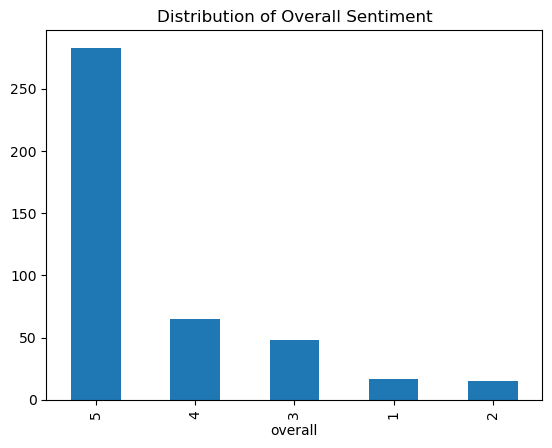

In [10]:
verified_reviews.overall.value_counts().plot(kind='bar', title='Distribution of Overall Sentiment')
#plt.show()
plt.savefig('distribution_of_sentiment.png', dpi=200)

### Question 2: Distribution, Moments 

Choose from this data set 1 numerical features where you have at least 100 measurements withresults in a discrete DVS S (if it is a continous S, choose intervals with some bin width d, tomap it on a discrete S). 

In [13]:
# Fill missing values with an empty string or any other appropriate value
verified_reviews['reviewText'].fillna('', inplace=True)
verified_reviews['tokens'] = verified_reviews['reviewText'].str.split().apply(len)

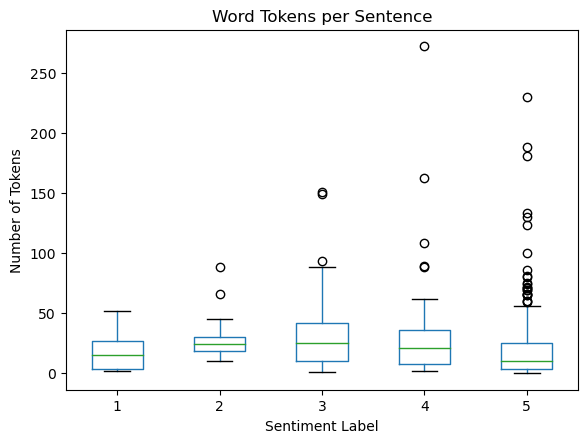

In [15]:
verified_reviews.boxplot("tokens", by="overall", grid=False, showfliers=True)
plt.title('Word Tokens per Sentence')
plt.suptitle('')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Tokens')
plt.show()

### Plotting the Histogram and the PMF Function

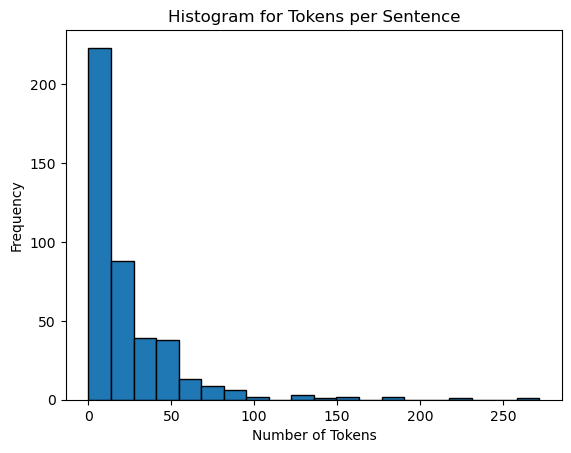

In [16]:
plt.hist(verified_reviews['tokens'], ec='black', bins=20)
plt.title('Histogram for Tokens per Sentence')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

###  Compute Mean, Standard Deviation, Skewness and Kurtosis

In [17]:
from scipy import stats

mean = np.mean(verified_reviews['tokens'])
standard_deviation = np.std(verified_reviews['tokens'])
skewness = stats.skew(verified_reviews['tokens'])
kurtosis = stats.kurtosis(verified_reviews['tokens'])

print(f"The Mean: {mean}")
print(f"The Standard Deviation: {standard_deviation}")
print(f"The Skewness: {skewness}")
print(f"The Kurtosis: {kurtosis}")

The Mean: 23.614485981308412
The Standard Deviation: 31.327982706148177
The Skewness: 3.5222956143485167
The Kurtosis: 17.69508631803023


### Fitting Probability Distributions

To fit probability distributions to my data:

1. Compute the probability mass function (pmf) by the bin.
2. Use the pmf and bins with the curve_fit method to fit the distribution.

In [18]:
from scipy.stats import norm
from scipy.optimize import curve_fit


# Compute the probability mass function (pmf) by the bin
counts, bins = np.histogram(verified_reviews['tokens'], bins=20, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Define a probability distribution function (PDF) to fit
def pdf_func(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Fit the distribution using curve_fit
popt, pcov = curve_fit(pdf_func, bin_centers, counts)

# Extract the parameters
mu_fit, sigma_fit = popt

print(f"Fitted Mean: {mu_fit}")
print(f"Fitted Standard Deviation: {sigma_fit}")


Fitted Mean: 3.4663875275305864
Fitted Standard Deviation: 1.7710356639102118


/home/marshal/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [19]:
pmf, bins = np.histogram(verified_reviews.tokens, bins=20, density=True)

In [20]:
pmf, bins

(array([0.03831089, 0.0151182 , 0.00670011, 0.00652831, 0.00223337,
        0.00154618, 0.00103079, 0.0003436 , 0.        , 0.00051539,
        0.0001718 , 0.0003436 , 0.        , 0.0003436 , 0.        ,
        0.        , 0.0001718 , 0.        , 0.        , 0.0001718 ]),
 array([  0. ,  13.6,  27.2,  40.8,  54.4,  68. ,  81.6,  95.2, 108.8,
        122.4, 136. , 149.6, 163.2, 176.8, 190.4, 204. , 217.6, 231.2,
        244.8, 258.4, 272. ]))

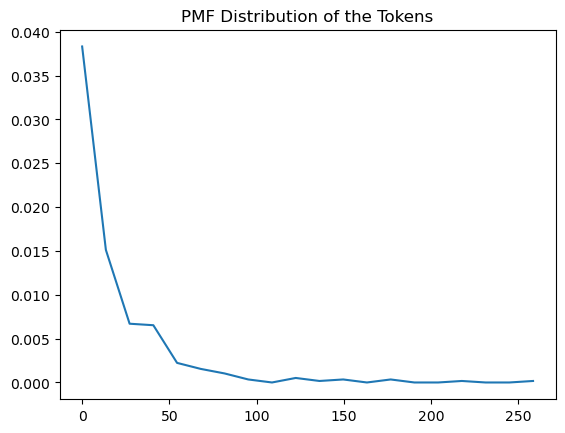

In [22]:
plt.plot(bins[:20], pmf)
plt.title('PMF Distribution of the Tokens')
plt.show();

###  Modelling the Distribution into Functions

#### 1. Normal Distribution

The probability density function (PDF) of the normal distribution is:

$$ f(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$

where:
- $ \mu $ is the mean of the distribution,
- $ \sigma $ is the standard deviation,
- $ x $ represents the variable.

In [26]:
from scipy.optimize import curve_fit
from scipy.stats import poisson, norm, lognorm, weibull_min, levy

# Convert the dataset to a NumPy array for better handling
data = np.array(verified_reviews.tokens)

# We need to create histogram data to fit
values, base = np.histogram(data, bins=20, density=True)

# Calculate mid points for bins
x_data = base[:-1] + np.diff(base) / 2

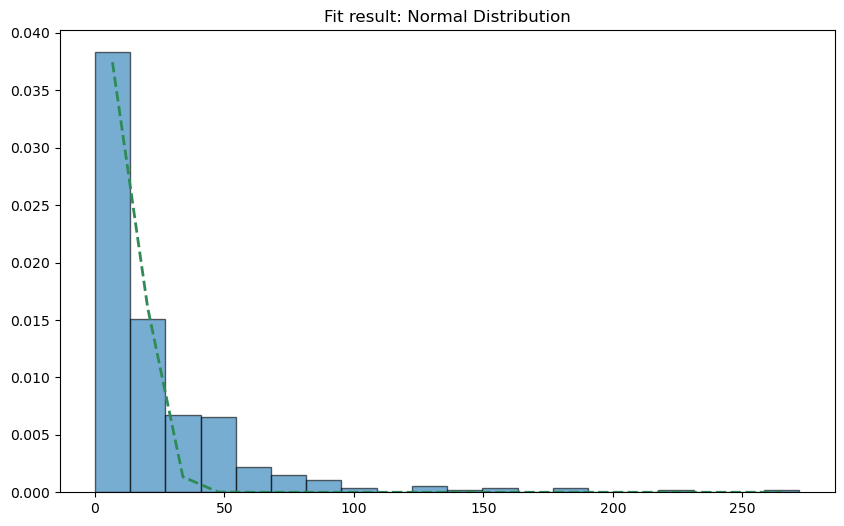

In [27]:
def fit_normal(x, mean, std):
    return norm.pdf(x, mean, std)

params_norm, _ = curve_fit(fit_normal, x_data, values, p0=[np.mean(data), np.std(data)])

# Plotting the result
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, ec='black')
plt.plot(x_data, fit_normal(x_data, *params_norm), color='seagreen', linestyle='--', linewidth=2)
plt.title("Fit result: Normal Distribution")
plt.show()

### 2. Poisson Distribution

The probability mass function (PMF) of the Poisson distribution is:

$$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

where:
- $ \lambda $ is the average number of events in an interval,
- $ k $ is the number of occurrences (an integer),
- $ e $ is the base of the natural logarithm.


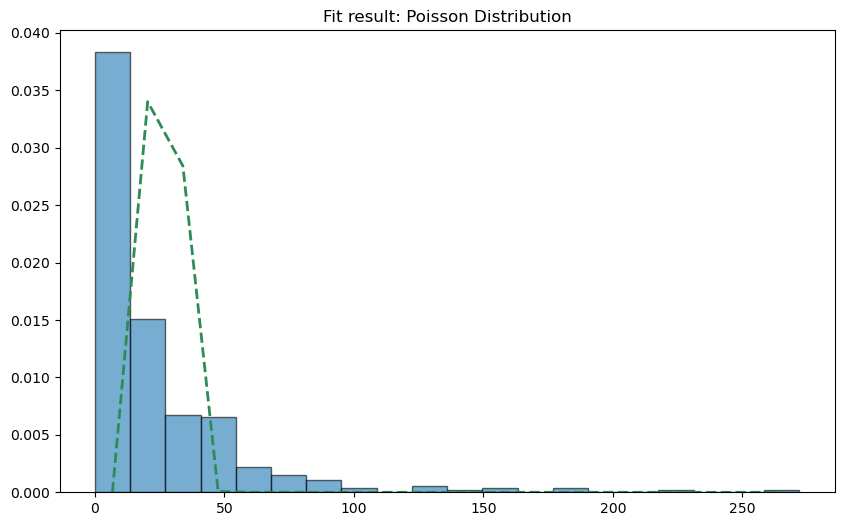

In [29]:
def fit_poisson(x, mu):
    # Because Poisson is a PMF and expects integers, we use the round function
    return poisson.pmf(np.round(x), mu)

params_poisson, _ = curve_fit(fit_poisson, x_data, values, p0=[np.mean(data)])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, ec='black')
plt.plot(x_data, fit_poisson(x_data, *params_poisson), color='seagreen', linestyle='--', linewidth=2)
plt.title("Fit result: Poisson Distribution")
plt.show()

### 3. Lognormal Distribution

The PDF of the lognormal distribution is:

$$ f(x | \mu, \sigma) = \frac{1}{x\sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right) $$

where:
- $ \mu $ and $ \sigma $ are the mean and standard deviation of the variable's natural logarithm,
- $ x $ must be greater than 0.

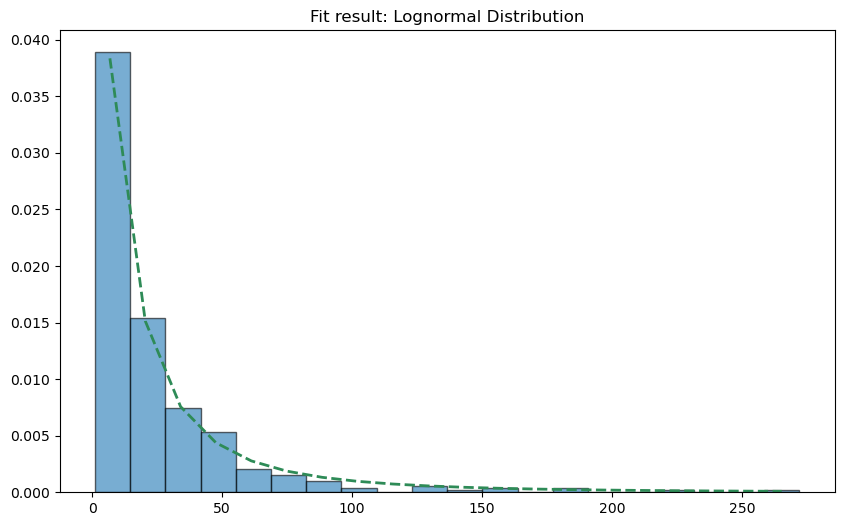

In [34]:
# Define the function to fit lognormal distribution
def fit_lognormal(x, mu, sigma):
    return lognorm.pdf(x, sigma, scale=np.exp(mu))

# Filter out zero or negative values from the data
data = data[data > 0]

# Fit the lognormal distribution to the filtered data
params_lognorm, _ = curve_fit(fit_lognormal, x_data, values, p0=[np.mean(np.log(data)), np.std(np.log(data))])

# Plot the histogram of the data and the fitted lognormal distribution
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, ec='black')
plt.plot(x_data, fit_lognormal(x_data, *params_lognorm), color='seagreen', linestyle='--', linewidth=2)
plt.title("Fit result: Lognormal Distribution")
plt.show()

### 4. Weibull Distribution

The PDF of the Weibull distribution is:

$$ f(x | k, \lambda) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k} $$

where:
- $ k $ is the shape parameter,
- $ \lambda $ is the scale parameter,
- $ x $ is the variable, typically $ x \geq 0 $.

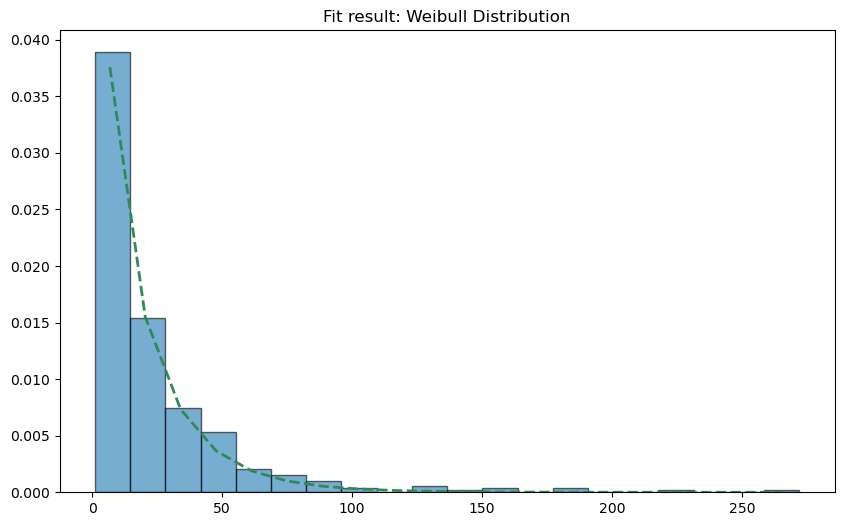

In [35]:
def fit_weibull(x, k, lam):
    return weibull_min.pdf(x, k, scale=lam)

params_weibull, _ = curve_fit(fit_weibull, x_data, values, p0=[1.5, np.mean(data)])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, ec='black')
plt.plot(x_data, fit_weibull(x_data, *params_weibull), color='seagreen', linestyle='--', linewidth=2)
plt.title("Fit result: Weibull Distribution")
plt.show()


### 5. Lévy Distribution

The PDF of the Lévy distribution is:

$$ f(x | \mu, c) = \sqrt{\frac{c}{2\pi}} \frac{e^{-\frac{c}{2(x-\mu)}}}{(x-\mu)^{3/2}} $$

where:
- $ \mu $ is the location parameter,
- $ c $ is the scale parameter,
- $ x > \mu $.


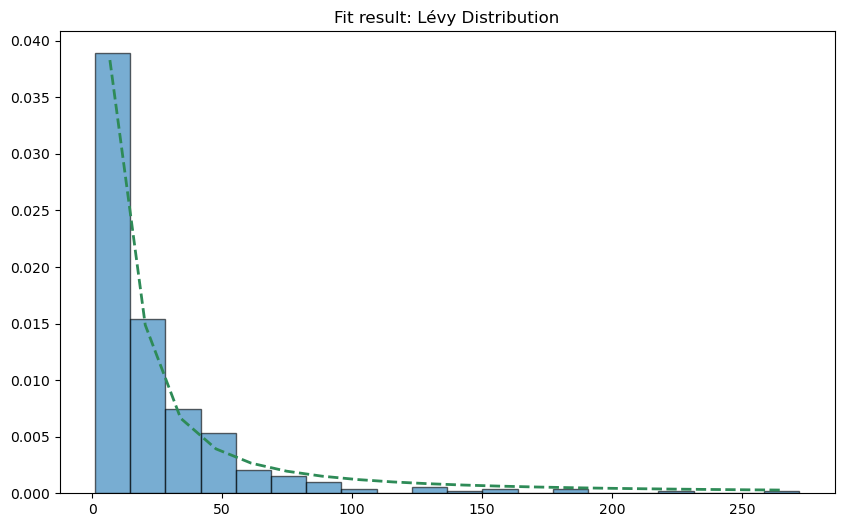

In [36]:
def fit_levy(x, mu, c):
    return levy.pdf(x, loc=mu, scale=c)

params_levy, _ = curve_fit(fit_levy, x_data, values, p0=[np.min(data), 3])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, ec='black')
plt.plot(x_data, fit_levy(x_data, *params_levy), color='seagreen', linestyle='--', linewidth=2)
plt.title("Fit result: Lévy Distribution")
plt.show()

### MSE Calculations

In [37]:
# Import necessary library for calculating MSE
from sklearn.metrics import mean_squared_error

# Evaluate each PDF at the bin centers and compute MSE
normal_pdf_values = fit_normal(x_data, *params_norm)
poisson_pdf_values = fit_poisson(x_data, *params_poisson)
lognormal_pdf_values = fit_lognormal(x_data, *params_lognorm)
weibull_pdf_values = fit_weibull(x_data, *params_weibull)
levy_pdf_values = fit_levy(x_data, *params_levy)

In [38]:
# Calculate MSE for each fitted distribution
mse_normal = mean_squared_error(values, normal_pdf_values)
mse_poisson = mean_squared_error(values, poisson_pdf_values)
mse_lognormal = mean_squared_error(values, lognormal_pdf_values)
mse_weibull = mean_squared_error(values, weibull_pdf_values)
mse_levy = mean_squared_error(values, levy_pdf_values)

# Printing MSE for each distribution
print(f"MSE - Normal Distribution: {mse_normal}")
print(f"MSE - Poisson Distribution: {mse_poisson}")
print(f"MSE - Lognormal Distribution: {mse_lognormal}")
print(f"MSE - Weibull Distribution: {mse_weibull}")
print(f"MSE - Lévy Distribution: {mse_levy}")


MSE - Normal Distribution: 4.08749961254803e-06
MSE - Poisson Distribution: 0.00011732813327377763
MSE - Lognormal Distribution: 3.5311039615657443e-07
MSE - Weibull Distribution: 5.207214464424118e-07
MSE - Lévy Distribution: 5.32606523748023e-07


In [39]:
params_lognorm

array([2.7080961 , 1.25339027])

### The lognormal distribution has the best fit with the lowest MSE at 5.32e-07. The parameters of the lognormal distribution are 𝜇 = 2.7080961 and 𝜎 = 1.25339027."